https://www.kaggle.com/code/shuvoalok/facial-emotion-recognition

In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
import os


def find_Class(directory_path):
    if not os.path.exists(directory_path):
        raise ValueError(f"The directory '{directory_path}' does not exist.")
    if not os.path.isdir(directory_path):
        raise ValueError(f"The path '{directory_path}' is not a directory.")

    # Get a list of all entries in the directory
    all_entries = os.listdir(directory_path)

    # Filter out only directories
    folders = [
        entry
        for entry in all_entries
        if os.path.isdir(os.path.join(directory_path, entry))
    ]

    return folders

In [3]:
DIRECTORY = r"data/RAF-DB/DATASET/train"
CATAGORIES = []
try:
    folders = find_Class(DIRECTORY)
    print(f"Directories in '{DIRECTORY}':")
    for folder in folders:
        CATAGORIES.append(folder)
except ValueError as e:
    print(e)

CATAGORIES
# you can rename these class according to the emotion of the folder

Directories in 'data/RAF-DB/DATASET/train':


['7', '6', '1', '4', '3', '2', '5']

In [4]:
data = []

for categories in CATAGORIES:
    folder = os.path.join(DIRECTORY, categories)
    label = CATAGORIES.index(categories)

    for img in os.listdir(folder):
        img = os.path.join(folder, img)
        img_arr = cv2.imread(img)
        if img_arr is not None:  # Check if the image is successfully loaded
            img_arr = cv2.resize(img_arr, (100, 100))
            data.append([img_arr, label])
        else:
            print(f"Failed to load image {img}")

#         img_arr=cv2.resize(img_arr,(100,100))

#         data.append([img_arr,label])

In [5]:
len(data)

12271

In [6]:
random.shuffle(data)

In [7]:
x = []
y = []


for features, label in data:
    x.append(features)
    y.append(label)

In [8]:
X = np.array(x)
Y = np.array(y)

In [9]:
X = X / 255

In [10]:
X.shape

(12271, 100, 100, 3)

In [11]:
Y.shape

(12271,)

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:], activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(7, activation="softmax"))

/Users/kaylahaeusssler/miniforge3/envs/xaifinal_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-22 18:18:14.739048: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2025-11-22 18:18:14.739066: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-11-22 18:18:14.739071: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2025-11-22 18:18:14.739090: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-22 18:18:14.739106: I tensorflow/core/common_runtime/pluggable_dev

In [14]:
model.compile(
    loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
)
checkpoint = ModelCheckpoint(
    r"fer.keras", monitor="val_accuracy", mode="max", save_best_only=True, verbose=1
)
earlystop = EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    min_delta=0.001,
    patience=20,
    verbose=1,
    restore_best_weights=True,
)

callbacks = [checkpoint, earlystop]

In [15]:
model.fit(X, Y, epochs=50, validation_split=0.25, callbacks=callbacks)

Epoch 1/50


2025-11-22 18:18:16.391451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3725 - loss: 1.6283
Epoch 1: val_accuracy improved from None to 0.59909, saving model to fer.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4535 - loss: 1.4642 - val_accuracy: 0.5991 - val_loss: 1.1353
Epoch 2/50
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6213 - loss: 1.0533
Epoch 2: val_accuracy improved from 0.59909 to 0.66069, saving model to fer.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6284 - loss: 1.0275 - val_accuracy: 0.6607 - val_loss: 0.9671
Epoch 3/50
285/288 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6935 - loss: 0.8895
Epoch 3: val_accuracy improved from 0.66069 to 0.68644, saving model to fer.keras
288/288 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6928 - loss: 0.8719 - val_accuracy: 0.6864 - val_loss: 0.8934
Epoch 4/50
287/288 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7307 - loss: 0.7638
Epoch 4: val_accuracy improved from 0.68644 to 0.69785, saving mod

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │        22,407 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,775 (932.72 KB)

 Trainable params: 79,591 (310.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 159,184 (621.82 KB)

In [17]:
from keras.preprocessing import image
import numpy as np

img_pred = image.load_img(
    r"data/RAF-DB/DATASET/test/1/test_0002_aligned.jpg", target_size=(100, 100)
)

img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)


rslt = model.predict(img_pred)

print(rslt)
print(CATAGORIES[np.argmax(rslt)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[1. 0. 0. 0. 0. 0. 0.]]
7


# GRAD CAM

In [27]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image  # you already use this

In [28]:
from keras.layers import Conv2D
from keras.models import Model


def get_last_conv_layer_name(model):
    # Walk backwards through layers and return the last Conv2D
    for layer in reversed(model.layers):
        if isinstance(layer, Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

In [29]:
def make_gradcam_heatmap(model, img_array, class_index=None, last_conv_layer_name=None):
    """
    img_array: numpy array of shape (1, H, W, 3)
    class_index: which class to explain (int). If None -> predicted class.
    last_conv_layer_name: optional; if None, auto-detect last Conv2D.
    """
    if last_conv_layer_name is None:
        last_conv_layer_name = get_last_conv_layer_name(model)

    # Build a functional model: input -> (last conv output, final prediction)
    input_shape = img_array.shape[1:]  # (H, W, 3)
    inputs = tf.keras.Input(shape=input_shape)

    x = inputs
    conv_output = None

    for layer in model.layers:
        x = layer(x)
        if layer.name == last_conv_layer_name:
            conv_output = x

    preds = x  # after final dense
    grad_model = Model(inputs=inputs, outputs=[conv_output, preds])

    # Run GradientTape on this functional model
    img_tensor = tf.cast(img_array, tf.float32)

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        if class_index is None:
            class_index = tf.argmax(predictions[0])
        class_score = predictions[:, class_index]

    grads = tape.gradient(class_score, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]  # (H, W, C)
    heatmap = tf.reduce_sum(pooled_grads * conv_outputs, axis=-1)

    heatmap = tf.nn.relu(heatmap)
    heatmap = heatmap.numpy()
    if np.max(heatmap) > 0:
        heatmap /= np.max(heatmap)

    return heatmap

In [30]:
def overlay_gradcam_on_image(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_uint8 = np.uint8(255 * heatmap_resized)

    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)
    heatmap_color = cv2.cvtColor(heatmap_color, cv2.COLOR_BGR2RGB)

    superimposed = np.uint8(alpha * heatmap_color + (1 - alpha) * img)
    return img, heatmap_resized, superimposed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted: 7 prob: 1.0


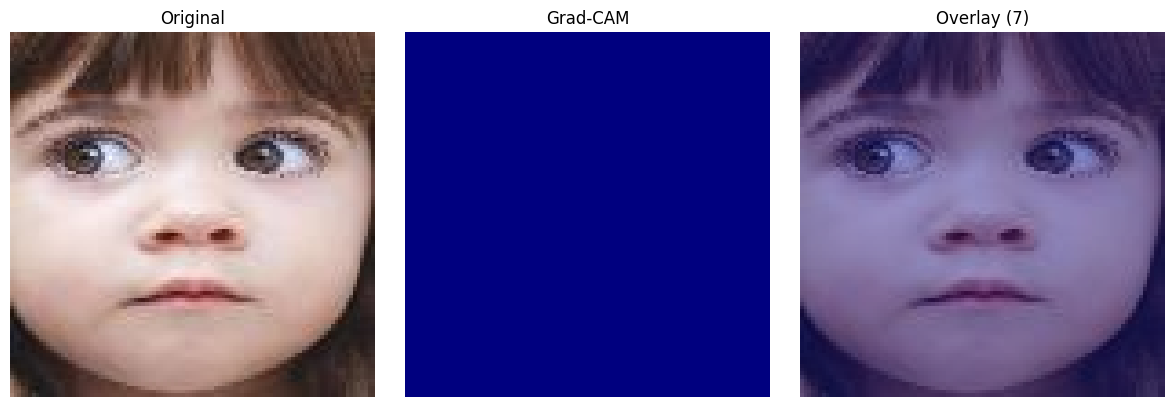

In [31]:
from keras.preprocessing import image

test_img_path = r"data/RAF-DB/DATASET/test/1/test_0002_aligned.jpg"

# 1. Load & preprocess like training
img_pred = image.load_img(test_img_path, target_size=(100, 100))
img_pred_arr = image.img_to_array(img_pred)
img_pred_arr = np.expand_dims(img_pred_arr, axis=0)

# (Optional) normalize if you later normalize X for training
# img_pred_arr = img_pred_arr / 255.0

# 2. Predict
probs = model.predict(img_pred_arr)
pred_index = np.argmax(probs[0])
pred_class_name = CATAGORIES[pred_index]
print("Predicted:", pred_class_name, "prob:", probs[0][pred_index])

# 3. Grad-CAM
heatmap = make_gradcam_heatmap(model, img_pred_arr, class_index=pred_index)

# 4. Overlay
orig_img, heatmap_resized, overlay = overlay_gradcam_on_image(test_img_path, heatmap)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(orig_img)
plt.axis("off")
plt.title("Original")
plt.subplot(1, 3, 2)
plt.imshow(heatmap_resized, cmap="jet")
plt.axis("off")
plt.title("Grad-CAM")
plt.subplot(1, 3, 3)
plt.imshow(overlay)
plt.axis("off")
plt.title(f"Overlay ({pred_class_name})")
plt.tight_layout()
plt.show()